In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
RC = np.loadtxt("rnd_sph_cat_R95.0_cut_0.cat")
RC.shape

N_rnd = RC.shape[0]

OC = np.loadtxt("sphere_data_cut_0.dat")
N_obs = OC.shape[0]
##### RE-CENERING!!!!  ############################################# Hey! To Do Centering
for x in OC:
    x += np.array([400,400,400])
    
FC = np.loadtxt("FC_CUT_0.cat")

XDLBSkel = np.loadtxt("0.BSKIndex")
XDLBSkel.shape

(110525, 2)

In [3]:
a = XDLBSkel[:,0]
a = list(a)
b = XDLBSkel[:,1]
b = list(b)

c = []
c.extend(a)
c.extend(b)
d = []
d.extend(b)
d.extend(a)

c = np.array(c, dtype=int)
d = np.array(d, dtype=int)

fcBSkel = np.vstack((c,d)).T
fcBSkel.shape

(221050, 2)

<IPython.core.display.Javascript object>


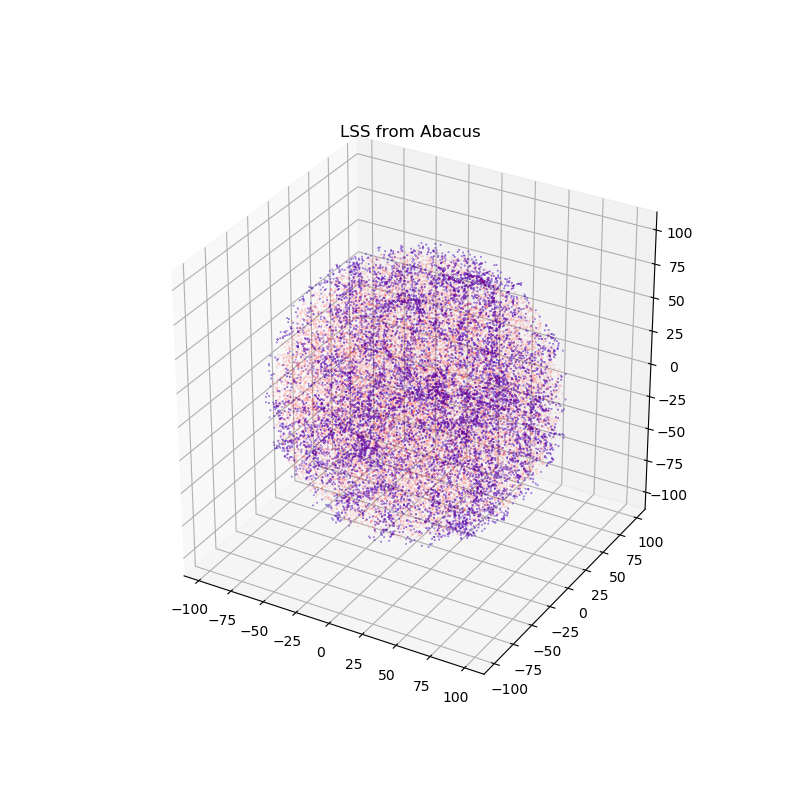

Text(0.5,0.92,'LSS from Abacus')

In [4]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = FC[:N_rnd,0]
Y = FC[:N_rnd,1]
Z = FC[:N_rnd,2]
ax.scatter(X, Y, Z, c="red", s=0.01)

X = FC[N_rnd:,0]
Y = FC[N_rnd:,1]
Z = FC[N_rnd:,2]
ax.scatter(X, Y, Z, c="blue", s=0.1)


plt.title("LSS from Abacus")

# Loading the Full Catalog Beta-Skeleton graph

In [5]:
# fcBSkel = np.loadtxt()
fcBSkel.shape

(221050, 2)

In [6]:
VOID_TYPE = "Real"
ax.scatter(X, Y, Z, c="red", s=0.01)

N = N_rnd   # Search for the first N points in the FC.
            # They are Random Points. So N = N_rnd

# Find RANDOM POINTS in the fcBeta-Skeleton Graph.
index = np.where(fcBSkel[:,0] < N)  
# Store the partial Beta-Skeleton Graph of Random Points and
# its connections. They may have connections with Obs. points
# and other Random points.
first_filter = np.array(fcBSkel[index]).astype(int)

# Find the Random Points connected only to Random Points.

# To do this, first we find those points whom are connected to 
# observational points.
index = np.where( first_filter[:,1] >= N )[0]
# They are going to be dropped.
droplist_raw = first_filter[index,0]
# A set of the Random Points connected to Observational points
# is created, there are not repeated items.
droplist = set(droplist_raw)

print( "First filter shape:", first_filter.shape, 
      "\nHow many of them have direct connections with galaxies", len(droplist) )


# We have the Random points set:
rndmcat_index = set(range(N))
# and the droplist. The complement(difference) is the
# pure void points set.
trueVoidPointsIndex = rndmcat_index.difference(droplist)
# This set is converted to list, it will be used as an index to find 
# True Voids.
trueVoidPointsIndex = list(trueVoidPointsIndex)

# This is the first definition of TRUE VOID POINTS.
void_cat = FC[trueVoidPointsIndex]

First filter shape: (156190, 2) 
How many of them have direct connections with galaxies 14800


<IPython.core.display.Javascript object>


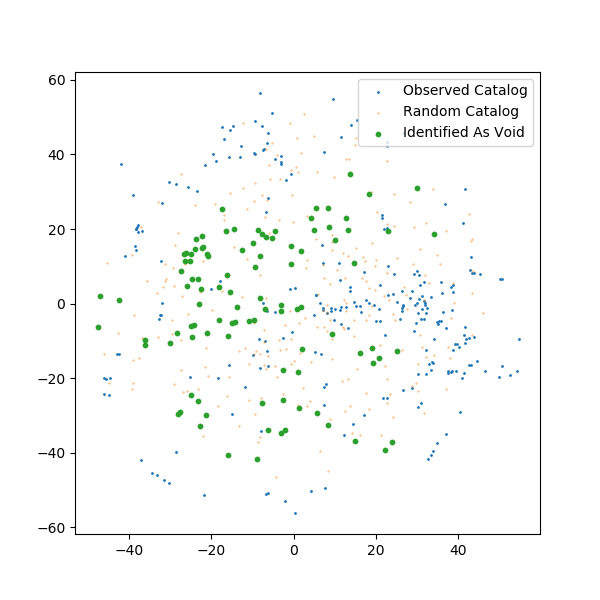

<IPython.core.display.Javascript object>


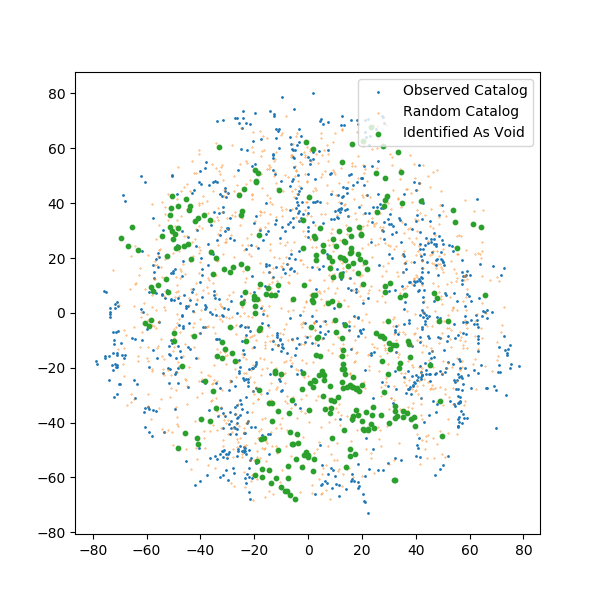

<IPython.core.display.Javascript object>


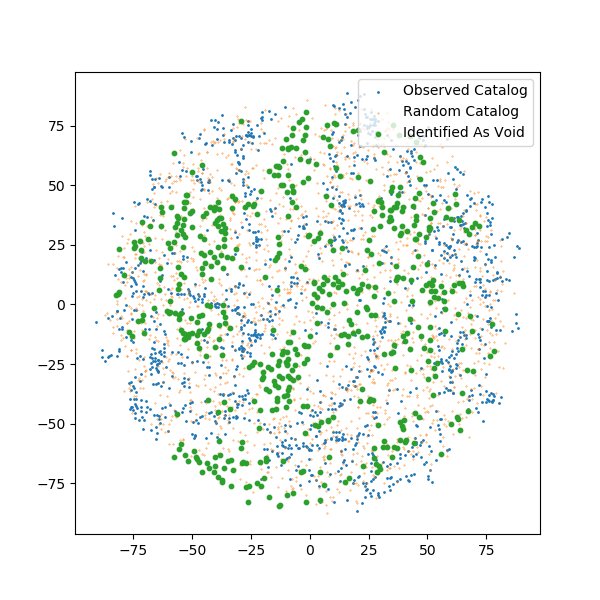

<IPython.core.display.Javascript object>


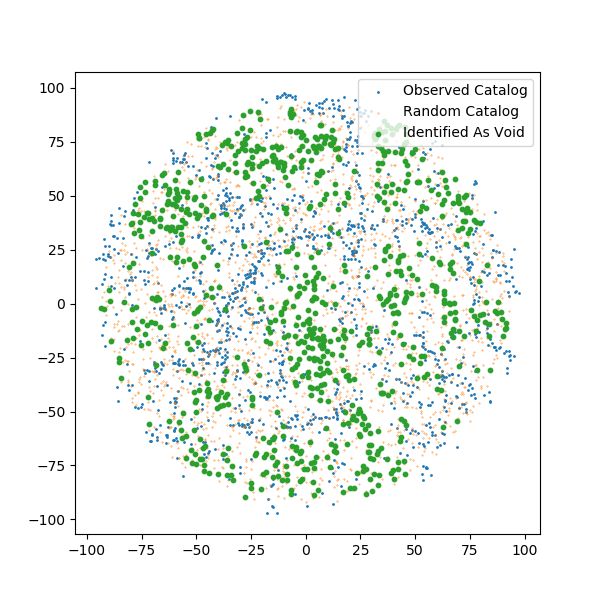

<IPython.core.display.Javascript object>


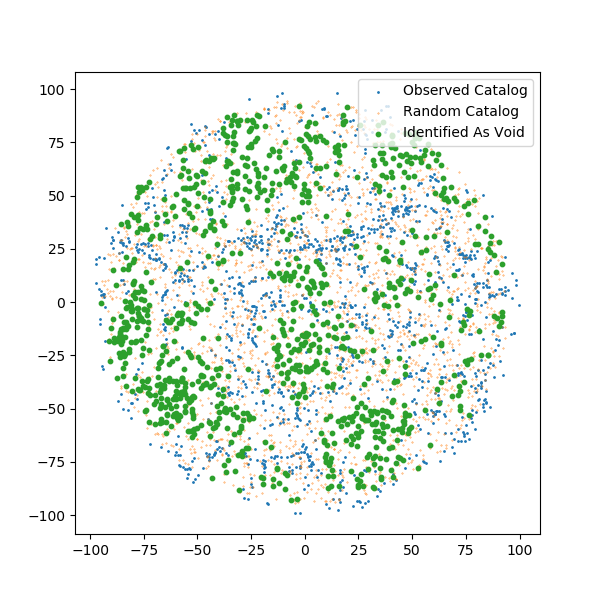

<IPython.core.display.Javascript object>


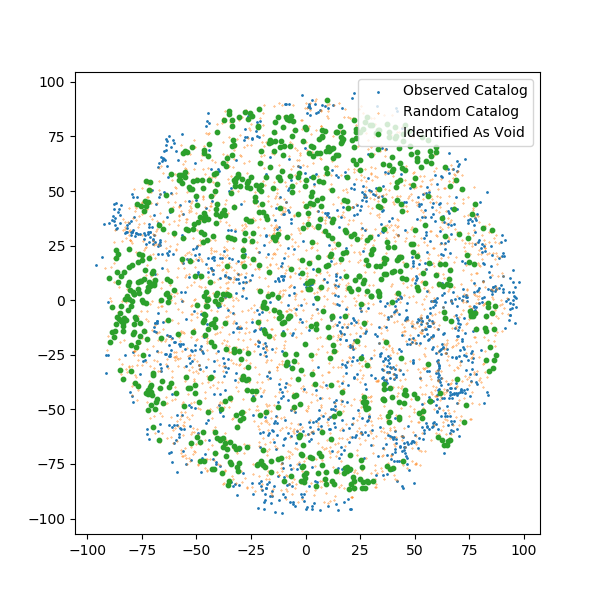

<IPython.core.display.Javascript object>


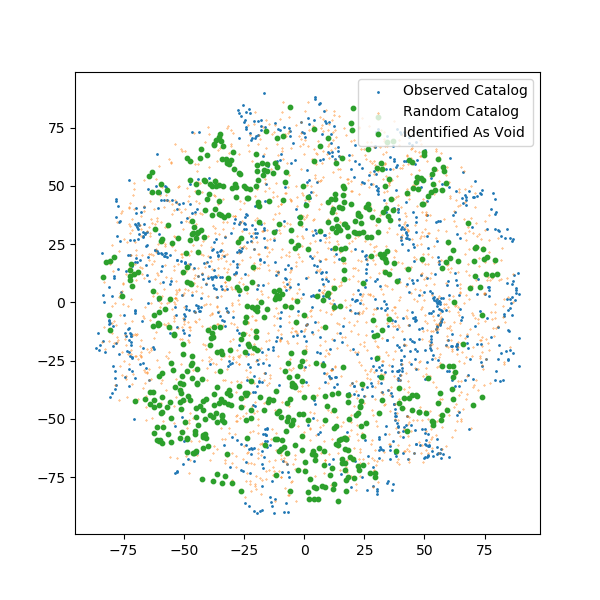

<IPython.core.display.Javascript object>


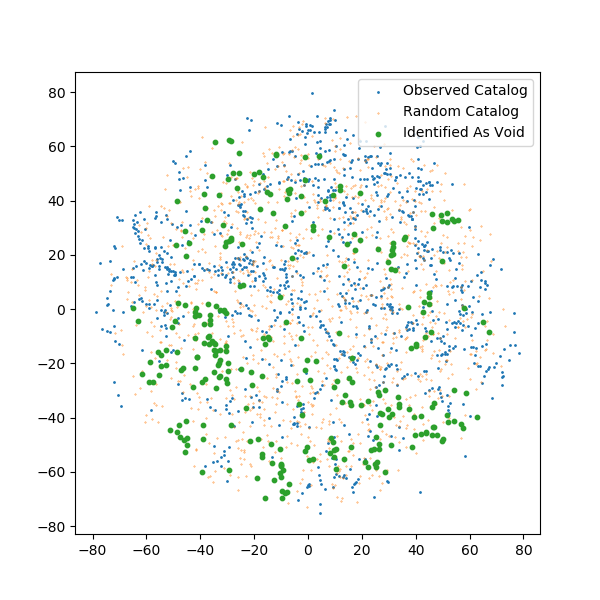

<IPython.core.display.Javascript object>


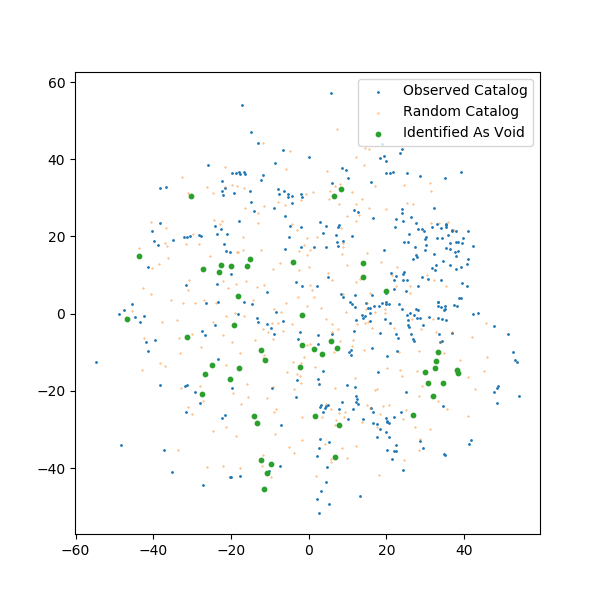

In [7]:
for k in np.linspace(-90,90,9):
    slice_height = 10
    BoxCenter = k

    fig = plt.figure(figsize=[6,6])

    index = np.where( abs(OC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(OC[index,0], OC[index,1], s=1, label="Observed Catalog")

    index = np.where( abs(RC[:,2] - BoxCenter) < slice_height )        
    plt.scatter(RC[index,0], RC[index,1], s=0.1, label="Random Catalog")

    index = np.where( abs(void_cat[:,2] - BoxCenter) < slice_height )        
    plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

    plt.legend(loc=1)

<IPython.core.display.Javascript object>


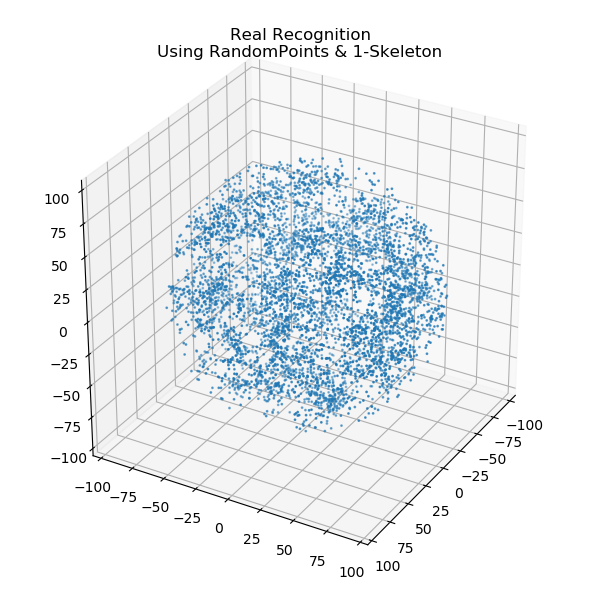

In [8]:
x = void_cat[:,0]
y = void_cat[:,1]
z = void_cat[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=1)
ax.view_init(30, 30)

plt.title(VOID_TYPE +" Recognition" + "\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()

#plt.close()

plt.show()


# True Void Points found. 

# Looking for their connections (To identify individidual voids)

In [9]:
# Looking for the connections of the TrueVoidPoints
index=[]
for k in trueVoidPointsIndex:
    index.extend( list( np.where( fcBSkel[:,0] == k)[0].astype(int) ) )

index = list(set(index ) )
index.sort()

# Beta-Skeleton of TrueVoidPoints (includes Frontier Points)
VoidsBS = np.array(fcBSkel[index]).astype(int)
trueVoidPointsIndex.sort()

print(VoidsBS.shape)
print(len(trueVoidPointsIndex))

(37268, 2)
5178


In [10]:
np.savetxt("BS_of_TrueVoidPoints.bsk", VoidsBS)

In [11]:
# This is the MasterList of Voids.

# Each TrueVoidPoint_index is checked.
# If doesn't exists, is identified as a new void (a new sublist is created)
# If it exists already, the point and its connections are added to the existing void sublist.

MasterList = []

for search in trueVoidPointsIndex:
    
    # Does the TrueVoidPoint belongs to any existing Void?
    is_in_master = any( search in sublist for sublist in MasterList)

    # Create a new void.
    # If is the first time it appears on the MasterList
    if not is_in_master:
        my_list = []
        
        # Find B-Skeleton connections of the TrueVoidPoint.
        index = np.where(VoidsBS[:,0] == search)
        # Append them to the auxiliar list.
        my_list.append(search)
        my_list.extend( list(VoidsBS[index,1][0]) )
        my_list.sort()
        # Append this auxiliar list to the MasterList.
        # a new void has been appended. :)
        MasterList.append(my_list)

    # If the TrueVoidPoint already exists in the Masterlist
    if is_in_master:
        repetitions = []
        
        # Find how many times the TrueVoidPoint has appeared before
        # in the MasterList. (Store the search)
        for k in range(len(MasterList)):
            if(search in MasterList[k]):
                sublist = MasterList[k]
                #print("Si está en la sublista", k, sublist)
                repetitions.append(k)
                
        #print(search, "appears in sublists:" , repetitions)
        
        # If it appears only in one time in the sublitst, append the 
        # TrueVoidPont and its B-Skeleton connections to the existing void.
        if ( len(repetitions) == 1 ):
            j = repetitions[0]
            index = np.where(VoidsBS[:,0] == search)
            my_list = list(VoidsBS[index,1][0])
            my_list.sort()
            MasterList[j].extend(my_list)
        
        # If the TrueVoidPoint appears more than one time, the lists
        # will merge into a new one.
        # Old lists will be empty. They will be removed after this
        # cicle ends.
        elif (len(repetitions) > 1):
            # print("Friend of many friends, n=", len(repetitions))
            my_list = []
            for j in repetitions:
                my_list.extend(MasterList[j]) # collect data create a new list
                MasterList[j]=[]              # Empty the merged lists.
            my_list.sort()
            MasterList.append(my_list)

# Emtpy lists removed. 
while( [] in MasterList):
    MasterList.remove([])

In [12]:
# Sort each void list at the MasterList
for j in range(len(MasterList)):
    MasterList[j] = list( set(MasterList[j]))
    MasterList[j].sort()

# Some lists may share elements (FrontierPoints).
# Those FrontierPoints may be in a BottleNeck
# 
#                       
#     T       F    Halo     F     T   
#                                     T
#       T       F <----> F      T
#   T                                 T
#        T     F    Halo    F   T
#
#   Void_1                       Void_2
#
#

# This is a list of voids and the common particles.
to_merge = []
for i in range(len(MasterList)):              # For each VoidList
    for j in range(len(MasterList)):          # compare against other VoidLists
        if (j > i):
            # Check if two or more lists have common elements.
            aux = [x for x in MasterList[i] if x in MasterList[j]]
            # Store the common elements in the aux list.

            if (len(aux)>0):              # If the list is not empty
                # Void[i], Void[j], common particles.
                # print( i, j, aux)
                to_merge.append([i,j])   # Store the two void indices.
                
                ## NOTE: Many voids can be concatenated.

In [13]:

# This is a recount to concatenate those voids that share
# particles. Runs over the previous "to merge" list.

to_merge2 = []
for i in range( len(to_merge)):
    x = to_merge[i][0]
    y = to_merge[i][1]
    
    is_in_list1 = any( x in sublist for sublist in to_merge2 )
    is_in_list2 = any( y in sublist for sublist in to_merge2 )
    
    if( (is_in_list1 == False) & (is_in_list2 == False) ):
        to_merge2.append(to_merge[i])
    
    elif( (is_in_list1 == False) & (is_in_list2 == True) ):
            aux = []
            for j in range(len(to_merge2)):
                if( y in to_merge2[j]):
                    to_merge2[j].append(x)

    elif( (is_in_list1 == True) & (is_in_list2 == False) ):
            aux = []
            for j in range(len(to_merge2)):
                if( x in to_merge2[j]):
                    to_merge2[j].append(y)

    
for x in to_merge2:
    x.sort()
    
print( to_merge2)

[[0, 58, 104, 203, 209, 235, 239, 247, 248, 269, 324, 418, 455, 467, 530, 533], [1, 177, 260, 264, 307, 388, 446, 512], [2, 11, 23, 53, 78, 109, 111, 131, 134, 142, 148, 155, 164, 165, 184, 201, 207, 212, 215, 224, 238, 241, 250, 263, 265, 276, 281, 283, 294, 296, 304, 318, 321, 333, 342, 356, 383, 393, 398, 403, 409, 441, 450, 459, 487, 501, 514, 527, 528], [3, 27, 29, 37, 44, 63, 86, 144, 181, 193, 220, 222, 227, 231, 240, 246, 278, 280, 291, 297, 345, 347, 376, 384, 391, 407, 413, 436, 468, 483, 491, 495, 502, 522, 531, 534, 535], [5, 326, 358, 419], [6, 74, 453, 466], [7, 54, 359, 367, 447, 477, 494], [8, 87, 371, 415, 485], [10, 154], [12, 137], [13, 48, 138, 163, 353, 458, 526], [15, 21, 145, 169, 489], [16, 99], [17, 262, 286, 311, 316, 451, 507, 511], [18, 126, 251, 315, 327, 329, 334, 433], [19, 52, 199], [22, 38, 46, 82, 88, 97, 105, 113, 153, 178, 204, 225, 272, 277, 288, 306, 310, 317, 339, 341, 389, 416, 420, 448, 452, 470, 490, 500, 518, 524, 525], [24, 192, 221], [26, 11

In [14]:
for sublist in to_merge2:
    aux = []
    for x in sublist:
        aux.extend(MasterList[x])
        MasterList[x] = []
    aux.sort()
    MasterList.append(aux)
    
while( [] in MasterList):
    MasterList.remove([])
 

<IPython.core.display.Javascript object>


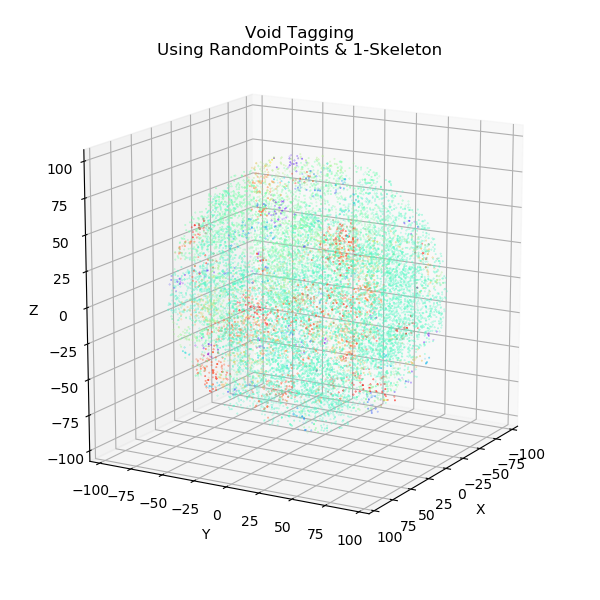

In [15]:
colors = cm.rainbow( np.linspace(0,1, len(MasterList)))


x = RC[:,0]
y = RC[:,1]
z = RC[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

for k in range(len(MasterList)): 
    void = MasterList[k]
    ax.scatter(x[void], y[void], z[void], s=0.1, c=colors[k])

ax.view_init(15, 30)

plt.title("Void Tagging\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()


plt.savefig("./tagging_voids.pdf", format="pdf")
#plt.close()

plt.show()

In [16]:
print("Total number of Void Particles", len(trueVoidPointsIndex))

aux = 0
for Void in MasterList:
    print( len(Void))
    aux += len(Void)

print("Total number of particles in halos:", aux , "(Void + Frontier particles)")

Total number of Void Particles 5178
5
7
12
6
6
4
27
5
17
7
6
7
8
8
7
5
6
4
5
5
6
6
12
6
17
5
4
5
7
9
8
5
9
4
6
9
14
7
6
15
10
5
5
7
8
6
7
5
7
4
8
6
6
4
5
5
5
6
8
6
7
5
9
7
8
13
9
10
442
102
3638
3193
31
38
101
60
18
11
126
133
19
103
134
27
2681
21
46
244
53
25
56
89
19
17
17
154
76
27
17
15
69
137
54
40
70
51
17
185
89
19
36
57
63
60
55
109
12
13
30
38
19
21
20
35
29
38
53
50
12
47
15
37
14
46
11
33
13
106
149
19
35
30
17
61
16
16
87
65
61
14
20
13
23
42
14
12
66
27
21
25
13
26
28
22
16
52
42
Total number of particles in halos: 15076 (Void + Frontier particles)


In [17]:

X = RC[:,0]
Y = RC[:,1]
Z = RC[:,2]

with open("void_masterlist_0.cat", 'w') as file:
    
    for halo in MasterList:   
        for particle in halo:
            line  = str(MasterList.index(halo) *1.0) + " " 
            line += str(X[particle]) + " " 
            line += str(Y[particle]) + " " 
            line += str(Z[particle] ) + "\n"

            file.write(line)

In [18]:
print( len(MasterList))

167


In [19]:
MasterList

[[141, 1397, 3803, 6205, 9670],
 [265, 6065, 8015, 9019, 10629, 10779, 10952],
 [308, 433, 608, 1595, 2395, 7202, 11004, 11959, 16417, 16685, 18284, 18516],
 [565, 5266, 7806, 12363, 17695, 18103],
 [640, 5195, 5353, 6063, 11475, 14445],
 [772, 8727, 12361, 13244],
 [465,
  948,
  963,
  1058,
  1297,
  1826,
  2947,
  3760,
  4277,
  4383,
  4391,
  5857,
  6035,
  7104,
  9054,
  9668,
  10430,
  10783,
  11778,
  12488,
  12760,
  13164,
  13849,
  14575,
  16491,
  18459,
  19745],
 [749, 1167, 6394, 7473, 13063],
 [1262,
  2460,
  4468,
  5219,
  6707,
  7007,
  8195,
  8840,
  10523,
  12594,
  13175,
  13822,
  13942,
  16120,
  17306,
  17676,
  17949],
 [1450, 1585, 10514, 10518, 13700, 16831, 18686],
 [522, 741, 1629, 6577, 8762, 16561],
 [1760, 8360, 9590, 11138, 11291, 14921, 16060],
 [1783, 8469, 9367, 9853, 10507, 14388, 16084, 16886],
 [2243, 7663, 10791, 17257, 17480, 18260, 18776, 19111],
 [89, 182, 2275, 6404, 13120, 15316, 17235],
 [1559, 2619, 4617, 8714, 11994],
 [

In [20]:
index = np.where(fcBSkel[:,0]== 12069)[0]

In [21]:
index

array([111399, 138011, 174911, 178603])

In [22]:
np.where(fcBSkel[:,0] == 13003)

(array([162324, 178334, 182651]),)

In [23]:
fcBSkel

array([[    0, 18828],
       [    0, 11643],
       [    0, 26509],
       ...,
       [29935, 29868],
       [29952, 29897],
       [29945, 29925]])

In [24]:
Original_fcBSkel = np.loadtxt("0.BSKIndex")


In [25]:
np.where(Original_fcBSkel[:,1] == 13003)

(array([51799, 67809, 72126]),)

In [26]:
FC[13003]

array([ 27.3368222 , -38.48406787,   9.85245013])